In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, classification_report


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# Load and explore data

In [2]:
train = pd.read_csv('./dataset/Train_nyOWmfK.csv', engine='python')
test = pd.read_csv('./dataset/Test_bCtAN1w.csv', engine='python')
print(train.shape)
print(test.shape)
a = set(list(train.columns))-set(list(test.columns))
print(a)
train.head()

(87020, 26)
(37717, 24)
{'LoggedIn', 'Disbursed'}


,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [3]:
train.columns

Index(['ID', 'Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed'],
      dtype='object')

In [4]:
train.shape

(87020, 26)

Monthly_Income = revenue mensuel

DOB = date of birth

Lead_Creation_Date       = Date de création

Loan_Amount_Applied      = Montant du pret appliqué

Loan_Tenure_Applied      = Durée du pret appliqué

Existing_EMI             = rembourssement mensuel existant

Employer_Name            = Nom de l'empoyeur

Salary_Account           = Compte bancaire

Mobile_Verified          = Téléphone vérifier ou pas

Var5                     = ?

Var1                     = ?

Loan_Amount_Submitted    = Montant du pret soumis

Loan_Tenure_Submitted    = durée de pret soumis

Interest_Rate            = Taux d'intérêt

Processing_Fee           = Frais de dossier

EMI_Loan_Submitted       = rembourssement mensuel suggére

Filled_Form              = Formulaire rempli

Device_Type              = type de demande (directe ou enline ou ...)

Var2                     = ?

Source                   = source

Var4                     = ?

LoggedIn                 = ?

Disbursed                = Rembourser

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null 

In [6]:
train.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
train.City.unique()

array(['Delhi', 'Mumbai', 'Panchkula', 'Saharsa', 'Bengaluru',
       'Sindhudurg', 'Kochi', 'Surat', 'Pune', 'Bhubaneswar', 'Howrah',
       'Chennai', 'Ludhiana', 'Lucknow', 'Bardhaman', 'Indore',
       'Hyderabad', 'Udaipur', 'Faridabad', 'Angul', 'Kolkata',
       'Lakhisarai', 'Visakhapatnam', 'Patna', 'Gautam Buddha Nagar',
       'Chandigarh', 'Cuddalore', 'Ghaziabad', 'Meerut', 'Ahmedabad',
       'Vijayawada', 'Rourkela', 'Dibrugarh', 'Madurai', 'Haridwar',
       'Panipat', 'Vadodara', 'Gurgaon', 'Dehradun', 'Coimbatore',
       'Hooghly', 'Bastar', 'Jaipur', 'Valsad', 'Bharuch',
       'Dakshina Kannada', 'Buxar', 'Banka', 'Rupnagar', 'VISNAGAR',
       'Nagpur', 'Anantapur', 'Thiruvalla', 'Kutch', 'Prakasam', 'Koppal',
       'Amravati', 'Guwahati', 'Bhopal', 'Shimoga', 'Bijnor', 'Bhilwara',
       'Palwal', 'Bathinda', 'Bhiwadi', 'Jammu', 'Kottayam', 'Gwalior',
       'Agra', 'Satara', 'Varanasi', 'Kaithal', 'Asansol', 'Panaji',
       'Jodhpur', 'Alwar', 'Ambala', 'Mysor

In [8]:
train.Monthly_Income[:3]

0    20000
1    35000
2    22500
Name: Monthly_Income, dtype: int64

In [9]:
train.Loan_Amount_Applied[:3]

0    300000.0
1    200000.0
2    600000.0
Name: Loan_Amount_Applied, dtype: float64

In [10]:
train.Loan_Tenure_Applied[:3]

0    5.0
1    2.0
2    4.0
Name: Loan_Tenure_Applied, dtype: float64

In [11]:
train.Existing_EMI[:3]

0    0.0
1    0.0
2    0.0
Name: Existing_EMI, dtype: float64

In [12]:
train.Salary_Account.unique()

array(['HDFC Bank', 'ICICI Bank', 'State Bank of India', 'HSBC',
       'Yes Bank', nan, 'Kotak Bank', 'Indian Overseas Bank',
       'Bank of Maharasthra', 'Axis Bank', 'Central Bank of India',
       'Standard Chartered Bank', 'Andhra Bank', 'Bank of India',
       'IndusInd Bank', 'Corporation bank', 'UCO Bank',
       'The Ratnakar Bank Ltd', 'Citibank', 'Karur Vysya Bank',
       'Punjab National Bank', 'Lakshmi Vilas bank', 'Syndicate Bank',
       'Allahabad Bank', 'Bank of Baroda', 'Canara Bank',
       'Oriental Bank of Commerce', 'Vijaya Bank',
       'State Bank of Hyderabad', 'IDBI Bank', 'State Bank of Patiala',
       'Union Bank of India', 'ING Vysya', 'Federal Bank', 'Dena Bank',
       'Punjab & Sind bank', 'J&K Bank', 'Deutsche Bank',
       'Tamil Nadu Mercantile Bank', 'Indian Bank',
       'United Bank of India', 'Abhyuday Co-op Bank Ltd',
       'State Bank of Bikaner & Jaipur', 'Saraswat Bank',
       'State Bank of Travancore', 'Karnataka Bank', 'South Indian Ba

In [13]:
train.Mobile_Verified.unique()

array(['N', 'Y'], dtype=object)

In [14]:
train.Interest_Rate[:3]

0      NaN
1    13.25
2      NaN
Name: Interest_Rate, dtype: float64

In [15]:
train.Var2.unique()

array(['G', 'B', 'C', 'E', 'F', 'D', 'A'], dtype=object)

In [16]:
train.Var4.unique()

array([1, 3, 5, 4, 2, 7, 6, 0], dtype=int64)

In [17]:
train.Var1.unique()

array(['HBXX', 'HBXA', 'HAXM', 'HAXB', 'HBXC', 'HBXD', 'HBXH', 'HAXA',
       'HBXB', 'HAYT', 'HCXD', 'HVYS', 'HAVC', 'HCXG', 'HAZD', 'HCYS',
       'HCXF', 'HAXC', 'HAXF'], dtype=object)

In [18]:
train.Var5.unique()

array([ 0, 13, 10, 17,  3, 11, 14, 12,  5,  8,  1,  4,  6,  7, 16, 15,  9,
        2, 18], dtype=int64)

In [19]:
train.Device_Type.unique()

array(['Web-browser', 'Mobile'], dtype=object)

In [20]:
train.LoggedIn.unique()

array([0, 1], dtype=int64)

In [21]:
train.Disbursed.unique()

array([0, 1], dtype=int64)

In [22]:
train.Filled_Form.unique()

array(['N', 'Y'], dtype=object)

ID                       87020 non-null object

###################### int and float objects ############################

Monthly_Income           87020 non-null int64

Loan_Amount_Applied      86949 non-null float64

Loan_Tenure_Applied      86949 non-null float64

Existing_EMI             86949 non-null float64

Loan_Amount_Submitted    52407 non-null float64

Loan_Tenure_Submitted    52407 non-null float64

Interest_Rate            27726 non-null float64

Processing_Fee           27420 non-null float64

EMI_Loan_Submitted       27726 non-null float64


###################### date objects ############################


Lead_Creation_Date       87020 non-null object

DOB                      87020 non-null object


################### string objects ###############################



City                     86017 non-null object

Employer_Name            86949 non-null object

Salary_Account           75256 non-null object





##################### categorical objects #############################

Mobile_Verified          87020 non-null object

Gender                   87020 non-null object

Filled_Form              87020 non-null object

Device_Type              87020 non-null object

Var1                     87020 non-null object

Var2                     87020 non-null object

Source                   87020 non-null object

Var4                     87020 non-null int64

Var5                     87020 non-null int64

LoggedIn                 87020 non-null int64


####################### Target ###########################


Disbursed                87020 non-null int64

# Clean data

In [23]:
# ordered columns sch as : (int,float), (date), (string), (categorical), (target)
myColumns = ['ID', 'Monthly_Income' ,'Existing_EMI' ,'Loan_Amount_Submitted' ,'Loan_Tenure_Submitted' ,'EMI_Loan_Submitted', \
             'Loan_Amount_Applied' ,'Loan_Tenure_Applied', \
             'Interest_Rate' ,'Processing_Fee' ,'Lead_Creation_Date' , \
             'DOB' ,'Gender' ,'City' ,'Employer_Name' ,'Salary_Account' ,'Mobile_Verified' , \
             'Filled_Form' ,'Device_Type' ,'Var1' ,'Var2' ,'Source' ,'Var4' ,'Var5' ,'LoggedIn' , \
             'Disbursed']



In [26]:
# Create the new dataframe
df = train[myColumns]
df = df.set_index(['ID'])

In [27]:
# Drop irrelevent columns because they doesn't appear to affect much intuitively
# Remove the following columns: 'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Filled_Form', 'Device_Type', 'Lead_Creation_Date', 'Source', 'LoggedIn'
df = df.drop(['City', 
              'Employer_Name', 
              'Lead_Creation_Date',
              'LoggedIn',
              'Salary_Account',
              
              'Mobile_Verified', 
              'Filled_Form', 
              'Device_Type', 
              'Source', 
              ], axis=1)

In [28]:
from datetime import date 
  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
  
    return age 

In [29]:
# Convert DOB=date of birth to age
df['DOB'] = pd.to_datetime(df['DOB']).map(calculateAge)
#rename the column DOB with AGE
df.rename(columns={"DOB": "AGE", "Disbursed": "Target"}, inplace=True)

In [30]:
# comvert Monthly_Income to float
df['Monthly_Income'] = df['Monthly_Income'].astype(float)

# Missing value of column 'Existing_EMI' will replaced with 0 because just 111 are missing:
df['Existing_EMI'] = df['Existing_EMI'].fillna(0)

# 'Loan_Amount_Applied' and 'Loan_Tenure_Applied' missing values will be replaced with median because only 111 missing
df['Loan_Amount_Applied'] = df['Loan_Amount_Applied'].fillna(df['Loan_Amount_Applied'].median())
df['Loan_Tenure_Applied'] = df['Loan_Tenure_Applied'].fillna(df['Loan_Tenure_Applied'].median())

# High proportion missing so create a new variables
# 'EMI_Loan_Submitted', Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate' and 'Processing_Fee' existing values will be replaced with 1 and the missing values with 0
df['EMI_Loan_Submitted'] = (~df['EMI_Loan_Submitted'].isnull()).astype(int)
df['Loan_Amount_Submitted'] = (~df['Loan_Amount_Submitted'].isnull()).astype(int)
df['Loan_Tenure_Submitted'] = (~df['Loan_Tenure_Submitted'].isnull()).astype(int)
df['Interest_Rate'] = (~df['Interest_Rate'].isnull()).astype(int)
df['Processing_Fee'] = (~df['Processing_Fee'].isnull()).astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87020 entries, ID000002C20 to ID124821V10
Data columns (total 16 columns):
Monthly_Income           87020 non-null float64
Existing_EMI             87020 non-null float64
Loan_Amount_Submitted    87020 non-null int32
Loan_Tenure_Submitted    87020 non-null int32
EMI_Loan_Submitted       87020 non-null int32
Loan_Amount_Applied      87020 non-null float64
Loan_Tenure_Applied      87020 non-null float64
Interest_Rate            87020 non-null int32
Processing_Fee           87020 non-null int32
AGE                      87020 non-null int64
Gender                   87020 non-null object
Var1                     87020 non-null object
Var2                     87020 non-null object
Var4                     87020 non-null int64
Var5                     87020 non-null int64
Target                   87020 non-null int64
dtypes: float64(4), int32(5), int64(4), object(3)
memory usage: 9.6+ MB


In [32]:
# create the one-hot-encoding of columns 'Gender','Var1' and 'Var2'
df = pd.get_dummies(df, columns=['Gender','Var1', 'Var2'])

In [33]:
# Check the balance of classes
df["Target"].value_counts()

0    85747
1     1273
Name: Target, dtype: int64

In [34]:
myColumns = list(df.columns)

myColumns.pop(myColumns.index('Target'))

newdf = df[myColumns]
newdf['Target'] = df['Target']

newdf.head()

,Monthly_Income,Existing_EMI,Loan_Amount_Submitted,Loan_Tenure_Submitted,EMI_Loan_Submitted,Loan_Amount_Applied,Loan_Tenure_Applied,Interest_Rate,Processing_Fee,AGE,...,Var1_HCYS,Var1_HVYS,Var2_A,Var2_B,Var2_C,Var2_D,Var2_E,Var2_F,Var2_G,Target
ID,,,,,,,,,,,,,,,,,,,,,
ID000002C20,20000.0,0.0,0,0,0,300000.0,5.0,0,0,41,...,0,0,0,0,0,0,0,0,1,0
ID000004E40,35000.0,0.0,1,1,1,200000.0,2.0,1,0,34,...,0,0,0,0,0,0,0,0,1,0
ID000007H20,22500.0,0.0,1,1,0,600000.0,4.0,0,0,38,...,0,0,0,1,0,0,0,0,0,0
ID000008I30,35000.0,0.0,1,1,0,1000000.0,5.0,0,0,31,...,0,0,0,1,0,0,0,0,0,0
ID000009J40,100000.0,25000.0,1,1,0,500000.0,2.0,0,0,35,...,0,0,0,1,0,0,0,0,0,0


In [35]:
X_train, y_train = newdf.iloc[:,:-1], newdf.iloc[:,-1]

print(X_train.shape)

(87020, 40)


# Upsampling

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X_train, y_train)
print(Counter(y))

Using TensorFlow backend.


Counter({0: 85747, 1: 85747})


# XGBoost

In [39]:
clf = xgb.XGBClassifier(objective='binary:logistic')
clf.fit(X, y, eval_metric='auc')

y_pred = clf.predict(X)
print ("Score Train -->", round(clf.score(X, y) *100,2), " %")

print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['pred_0', 'pred_1'], index=['0', '1']))

print(f1_score(y, y_pred))

Score Train --> 96.64  %
   pred_0  pred_1
0   85561     186
1    5580   80167
0.96528597230584


## Tune n_estimators

In [41]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

clf = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

params = clf.get_xgb_params()

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=5,
                    num_boost_round=clf.get_params()['n_estimators'],
                    early_stopping_rounds=50,
                    metrics="auc", 
                    as_pandas=True, 
                    seed=123)

print(cv_results.tail())

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
418        0.998818       0.000046       0.997751      0.000279
419        0.998820       0.000046       0.997752      0.000278
420        0.998823       0.000047       0.997754      0.000279
421        0.998826       0.000046       0.997754      0.000280
422        0.998829       0.000045       0.997756      0.000280


### Confusion matrix with tuned n_estimators

In [42]:
clf.set_params(n_estimators=cv_results.shape[0])
    
#Fit the algorithm on the data
clf.fit(X, y,eval_metric='auc')

#Predict training set:
y_pred = clf.predict(X)
y_pred_prob = clf.predict_proba(X)[:,1]

print(pd.DataFrame(confusion_matrix(y, y_pred), 
                   columns=['pred_0', 'pred_1'], 
                   index=['0', '1']))

   pred_0  pred_1
0   85747       0
1    1266   84481


In [43]:
#Print model report:
print( "\nModel Report")
print( "Accuracy : %.4g" % accuracy_score(y, y_pred))
print( "AUC Score (Train): %f" % roc_auc_score(y, y_pred_prob))


Model Report
Accuracy : 0.9926
AUC Score (Train): 0.998698


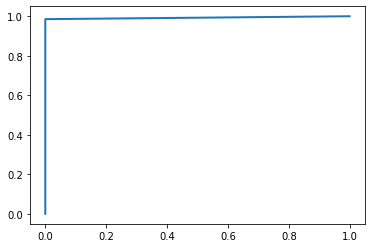

In [44]:
fpr, tpr, _ = roc_curve( y, y_pred )

plt.figure()
plt.plot(fpr, tpr, lw=2 )

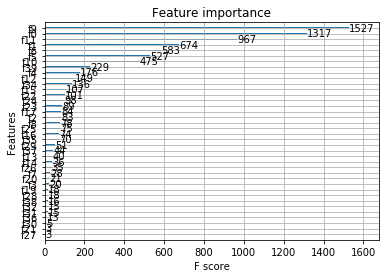

In [46]:
xgb.plot_importance(clf)
plt.rcParams['figure.figsize'] = [5, 20]

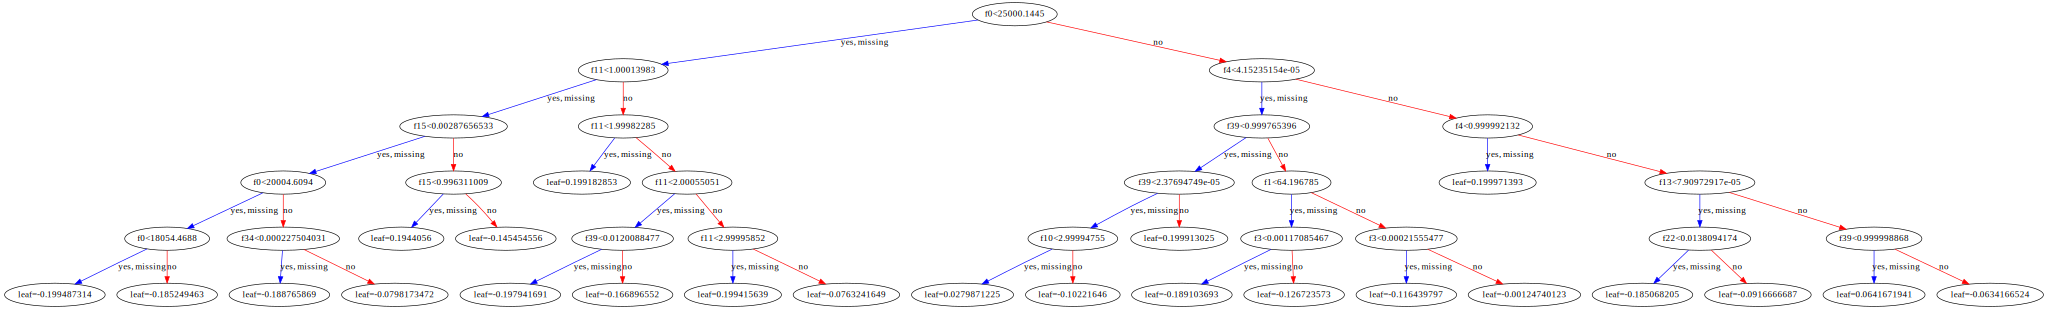

In [47]:
xgb.to_graphviz(clf, num_trees=0)

# Without upsampling

We must tune other parameters